In [1]:
#import needed packages
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime as dt
from statsmodels.graphics.gofplots import ProbPlot

import plotly.express as px

import sklearn
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Libraries needed for hierarchical clustering.
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime as dt

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

import sklearn
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Libraries needed for hierarchical clustering.
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
#set directory
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
data_dir= str(main_dir)+'\Data'

os.chdir(data_dir)

In [3]:
pip install -U imblearn

In [4]:
lego_subset= pd.read_csv('LEGO_subset1.csv')
print(lego_subset.shape)
lego_subset.head()
lego_subset= lego_subset.drop(columns='Unnamed: 0')
lego_subset.head()

(10165, 8)


,list_price,piece_count,num_reviews,review_difficulty,star_rating,country_num,min_age
0,29.99,277.0,2.0,3,4.5,1,6.0
1,19.99,168.0,2.0,2,5.0,1,6.0
2,12.99,74.0,11.0,2,4.3,1,6.0
3,99.99,1032.0,23.0,3,4.6,1,12.0
4,79.99,744.0,14.0,4,4.6,1,12.0


In [5]:
lego_subset.isna().sum()

list_price           0
piece_count          0
num_reviews          0
review_difficulty    0
star_rating          0
country_num          0
min_age              0
dtype: int64

In [6]:
lego_subset['star_rating'] = np.where(lego_subset['star_rating'] > 4.5, True, False)

columns_to_drop_from_X = ['star_rating']
X = lego_subset.drop(columns_to_drop_from_X, axis = 1)
y = np.array(lego_subset['star_rating'])

lego_subset['star_rating'].value_counts()

True     5888
False    4277
Name: star_rating, dtype: int64

<AxesSubplot:xlabel='star_rating'>

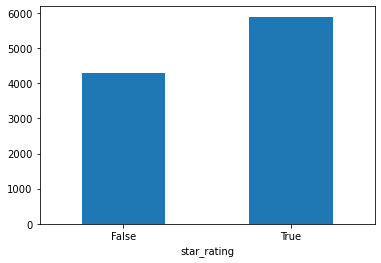

In [7]:
import matplotlib as plot
rating= lego_subset.groupby(['star_rating']).size()
rating.plot.bar(rot=0)

Very imbalanced, will use SMOTE

In [8]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

oversample= SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

#scale X
X_train = scale(X_train)
X_test = scale(X_test)
print(X_train[0:2])
print(X_test[0:2])

[[-0.54189473 -0.4500459  -0.40512307 -0.54958967  0.40058758 -0.1369661 ]
 [-0.52851804 -0.41175601 -0.26131654  0.66500057 -0.90772969 -0.48343349]]
[[-0.65782698 -0.57325371 -0.35266199  0.62979355  1.05831875 -1.18593346]
 [-0.60174978 -0.56880871 -0.37896331 -0.57678329 -0.24857823 -1.18593346]]


In [9]:
#kNN classifier
default = 5
kNN = KNeighborsClassifier(n_neighbors = default)
kNN.fit(X_train, y_train)

predictions = kNN.predict(X_test)
print(predictions[0:5])
actual_v_predicted = np.column_stack((y_test, predictions))
print(actual_v_predicted[0:5])

[ True False  True  True False]
[[False  True]
 [ True False]
 [ True  True]
 [False  True]
 [ True False]]


[[ 971  348]
 [ 488 1243]]
0.7259


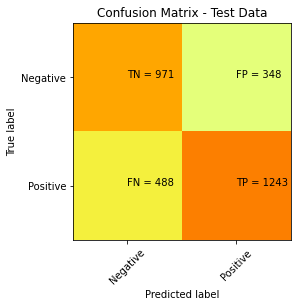

In [10]:
#confusion matrix
cm_kNN = confusion_matrix(y_test, predictions)
print(cm_kNN)
print(round(accuracy_score(y_test, predictions), 
4))

plt.imshow(cm_kNN, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_kNN[i][j]))
plt.show()

     metrics  values  model
0  precision  0.7259  kNN_k


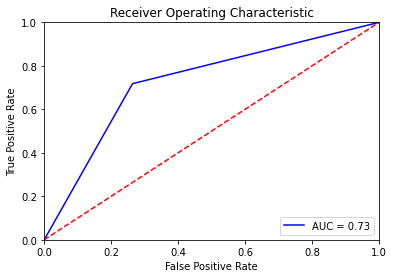

In [11]:
model_final_dict = {'metrics': ["precision"],
                    'values':[round(accuracy_score(y_test, predictions), 4)],
                    'model':['kNN_k']}
model_final = pd.DataFrame(data = model_final_dict)
print(model_final)



fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
cv_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', kNN)])
cv_scores = cross_val_score(cv_pipeline, X, y, cv = 5)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))

[0.71323168 0.75356616 0.79783571 0.79094934 0.72798819]
cv_scores mean:0.756714215445155
Optimal cv score is: 0.7567


GridSearch CV for finding optimal k

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
[0.85855109 0.7837822  0.79096424 0.77020388 0.77876251 0.76951567
 0.76636481 0.75623214 0.75347788 0.74629478 0.74216218 0.73537713
 0.72799698 0.71993163 0.71855436 0.71816085 0.7158961  0.71599405
 0.71265088 0.71146939 0.71245393 0.71678067 0.71205626 0.71186019
 0.7075318  0.70772914 0.69946306 0.70359567 0.70015214 0.69985725]
[0.8585510881936218, 0.7837821986853414, 0.790964237877345, 0.7702038766171928, 0.7787625136459713, 0.7695156744787433, 0.766364810040338, 0.7562321441014562, 0.7534778838485897, 0.7462947800772692, 0.7421621799487453, 0.7353771320620321, 0.7279969843371348, 0.7199316346518632, 0.718554359355523, 0.7181608521279973, 0.715896104801059, 0.7159940460982199, 0.7126508799231954, 0.7114693904412391, 0.7124539327495568, 0.71678067343352, 0.712056263984701, 0.7118601878305035, 0.707531801887596, 0.7077291361809862, 0.6994630649044975, 0.

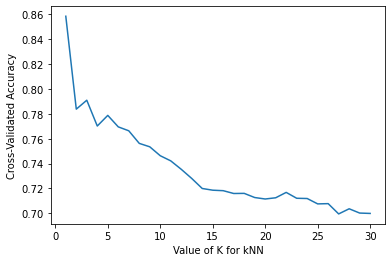

In [13]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
print(param_grid)
grid = GridSearchCV(kNN, param_grid, cv = 10, scoring = 'accuracy')


grid_search_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', grid)])
grid_search_pipeline.fit(X, y)
print(grid.cv_results_['mean_test_score'])

grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)


_ = plt.plot(k_range, grid_mean_scores)
_ = plt.xlabel('Value of K for kNN')
_ = plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [14]:
print(grid.best_score_)
grid_score = grid.best_score_
print(grid.best_params_)
print(grid.best_estimator_)

0.8585510881936218
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [15]:
model_final = model_final.append({'metrics' : "precision" , 
                                  'values' : round(grid_score, 4),
                                  'model':'kNN_GridSearchCV' } , 
                                  ignore_index = True)
print(model_final)

     metrics  values             model
0  precision  0.7259             kNN_k
1  precision  0.8586  kNN_GridSearchCV


C:\Users\625737\AppData\Local\Temp\ipykernel_35372\1972754243.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [16]:
kNN_best = grid.best_estimator_
print(kNN_best.score(X_test, y_test))
kNN_champ = kNN_best.score(X_test, y_test)

0.9819672131147541


In [17]:
model_final = model_final.append({'metrics' : "precision" , 
                                  'values' : round(kNN_champ, 4),
                                  'model':'kNN_optimized' },
                                 ignore_index= True)
print(model_final)

     metrics  values             model
0  precision  0.7259             kNN_k
1  precision  0.8586  kNN_GridSearchCV
2  precision  0.9820     kNN_optimized


C:\Users\625737\AppData\Local\Temp\ipykernel_35372\1870023099.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



kNN optimized most likely is overfitted due to the high accuracy score

# Logistic Regression

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model = linear_model.LogisticRegression()
print(logistic_regression_model)
logistic_regression_model.fit(X_train_scaled, y_train)
predicted_values = logistic_regression_model.predict(X_test_scaled)
print(predicted_values[:20])

LogisticRegression()
[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True]


In [20]:
#Confusion matrix
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

[[  41 1274]
 [  26 1709]]
Accuracy on test data:  0.5737704918032787


In [21]:
target_names = lego_subset['star_rating'].unique()
target_names=target_names.tolist()
target_names = [str(x) for x in target_names]

class_report = metrics.classification_report(y_test, 
                                             predicted_values, 
                                             target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

       False       0.61      0.03      0.06      1315
        True       0.57      0.99      0.72      1735

    accuracy                           0.57      3050
   macro avg       0.59      0.51      0.39      3050
weighted avg       0.59      0.57      0.44      3050



In [22]:
model_final = model_final.append({'metrics' : "precision" , 
                'values' : round(test_accuracy_score,4),
                'model':'logistic' },
                ignore_index= True)
print(model_final)

     metrics  values             model
0  precision  0.7259             kNN_k
1  precision  0.8586  kNN_GridSearchCV
2  precision  0.9820     kNN_optimized
3  precision  0.5738          logistic
